D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


          0         1         2         3         4         5  类别数目
0  0.807220  0.717751  0.809746  1.580052  1.518180  0.015476    63
1 -0.087133 -0.104777 -0.210834 -0.393205 -0.389850 -1.270748    89
2 -0.323882  0.751702 -0.370099 -0.080082 -0.081454  0.799054    69
3 -0.262686 -1.110894 -0.084973 -0.747118 -0.700359  0.721353    79


<Figure size 720x3600 with 0 Axes>

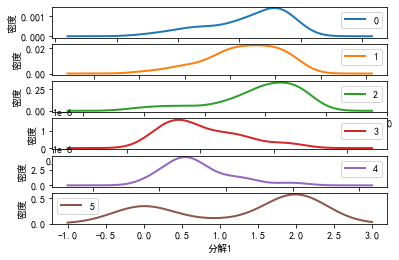

<Figure size 720x3600 with 0 Axes>

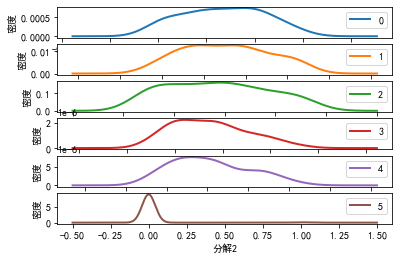

<Figure size 720x3600 with 0 Axes>

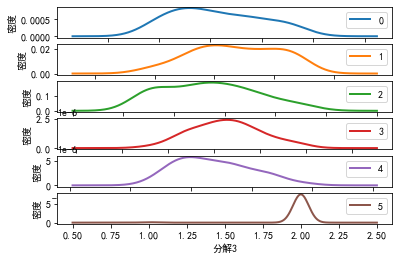

<Figure size 720x3600 with 0 Axes>

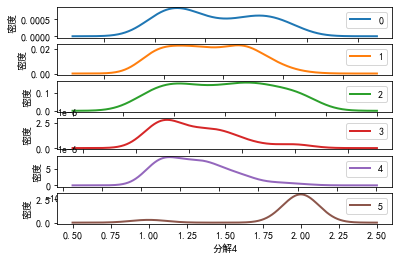

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# K-Means聚类算法
data=pd.read_csv(r'C:\Users\Windows 10\.spyder-py3\信用卡消费.csv')
data=np.array(data)
data1=data[:,2:6]
data2=data[:,7:]
data3=np.hstack((data1,data2))
data=pd.DataFrame(data3)
outputfile=r'D:\data_type.xls'
k=4
iteration=500
zscoredfile=r'D:\zscoreddata.xls'
data_zs=1.0*(data-data.mean())/data.std()
data_zs.to_excel(zscoredfile,index=False)
from sklearn.cluster import KMeans
model=KMeans(n_clusters=k,n_jobs=4,max_iter=iteration)
model.fit(data_zs)
r1=pd.Series(model.labels_).value_counts()
r2=pd.DataFrame(model.cluster_centers_)
r=pd.concat([r2,r1],axis=1)
r.columns=list(data.columns)+[u'类别数目']
print(r)
r=pd.concat([data,pd.Series(model.labels_,index=data.index)],axis=1)
r.columns=list(data.columns)+[u'聚类类别']
r.to_excel(outputfile)
def density_plot(data):
    plt.figure(figsize=(10,50))
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus']=False
    p=data.plot(kind='kde',linewidth=2,subplots=True,sharex=False)
    [p[i].set_ylabel(u'密度') for i in range(len(p))]
    plt.xlabel('分解%s'%(i+1))
    plt.legend()
    return plt
pic_output=r'D:\pd_'
for i in range(k):
    density_plot(data[r[u'聚类类别']==i]).savefig(u'%s%s.png'%(pic_output,i))

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed

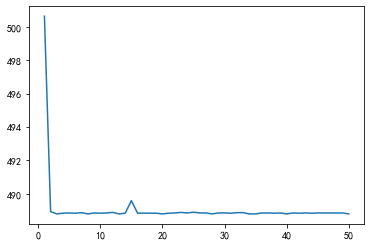

In [5]:
import matplotlib.pyplot as plt
loss=[]
center=[]
for i in range(1,501,10):
    model=KMeans(n_clusters=k,n_jobs=4,max_iter=i)
    model.fit(data_zs)
    data_zs=np.array(data_zs)
    first=[]
    second=[]
    thred=[]
    four=[]
    center.append(model.cluster_centers_)
    for i in range(len(model.labels_)):
        if model.labels_[i]==0:
            first.append(i)
        elif model.labels_[i]==1:
            second.append(i)
        elif model.labels_[i]==2:
            thred.append(i)
        else:
            four.append(i)
    cost1=0
    cost2=0
    cost3=0
    cost4=0
    for j in first:
        cost1+=np.sqrt(np.square(np.subtract(data_zs[j],model.cluster_centers_[0])).sum())
    for j in second:
        cost2+=np.sqrt(np.square(np.subtract(data_zs[j],model.cluster_centers_[1])).sum())
    for j in thred:
        cost3+=np.sqrt(np.square(np.subtract(data_zs[j],model.cluster_centers_[2])).sum())
    for j in four:
        cost4+=np.sqrt(np.square(np.subtract(data_zs[j],model.cluster_centers_[3])).sum())
    loss.append(cost1+cost2+cost3+cost4)
y=range(1,51)
plt.plot(y,loss)
        
    
    

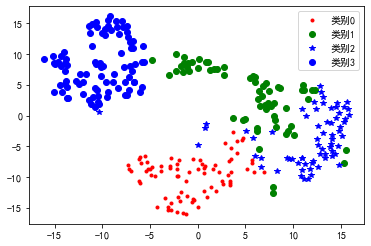

In [6]:
from sklearn.manifold import TSNE

tsne=TSNE(random_state=105)
tsne.fit_transform(data_zs)
tsne=pd.DataFrame(tsne.embedding_,index=data_zs.index)

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

d=tsne[r[u'聚类类别']==0]
plt.plot(d[0],d[1],'r.',label='类别0')
d=tsne[r[u'聚类类别']==1]
plt.plot(d[0],d[1],'go',label='类别1')
d=tsne[r[u'聚类类别']==2]
plt.plot(d[0],d[1],'b*',label='类别2')
d=tsne[r[u'聚类类别']==3]
plt.plot(d[0],d[1],'bo',label='类别3')
plt.legend()
plt.show()



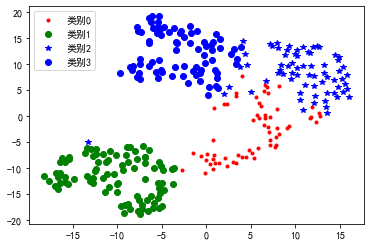

In [6]:
from sklearn.manifold import TSNE

tsne=TSNE(random_state=50)
tsne.fit_transform(data_zs)
tsne=pd.DataFrame(tsne.embedding_,index=data_zs.index)

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

d=tsne[r[u'聚类类别']==0]
plt.plot(d[0],d[1],'r.',label='类别0')
d=tsne[r[u'聚类类别']==1]
plt.plot(d[0],d[1],'go',label='类别1')
d=tsne[r[u'聚类类别']==2]
plt.plot(d[0],d[1],'b*',label='类别2')
d=tsne[r[u'聚类类别']==3]
plt.plot(d[0],d[1],'bo',label='类别3')
plt.legend()
plt.show()


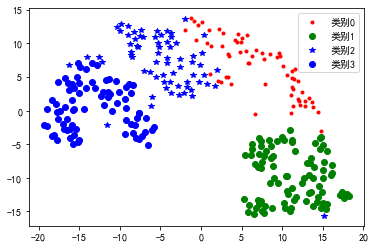

In [4]:
from sklearn.manifold import TSNE

tsne=TSNE()
tsne.fit_transform(data_zs)
tsne=pd.DataFrame(tsne.embedding_,index=data_zs.index)

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

d=tsne[r[u'聚类类别']==0]
plt.plot(d[0],d[1],'r.',label='类别0')
d=tsne[r[u'聚类类别']==1]
plt.plot(d[0],d[1],'go',label='类别1')
d=tsne[r[u'聚类类别']==2]
plt.plot(d[0],d[1],'b*',label='类别2')
d=tsne[r[u'聚类类别']==3]
plt.plot(d[0],d[1],'bo',label='类别3')
plt.legend()
plt.show()

In [7]:
tsne

,0,1
0,-10.866603,-6.759982
1,-13.264431,-4.974634
2,-12.363886,-7.239297
3,-12.418059,-6.341922
4,-7.664856,16.465738
...,...,...
295,14.675692,3.683484
296,6.591696,0.196810
297,11.710297,-0.460033
298,-7.585814,8.366228


In [10]:
import PyQt5
from PyQt5.QtWebEngineWidgets import QWebEngineView